# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [4]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

data = pd.read_parquet('/content/drive/MyDrive/trip_records/2023-1.parquet')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [9]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [10]:
# from google.colab import drive
# drive.mount('/content/drive')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import os

# Change to the directory containing the data
os.chdir('/content/drive/My Drive/trip_records')

In [12]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
import pandas as pd

# Select the folder having data files
os.chdir('/content/drive/My Drive/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        data = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Convert datetime column to datetime type if not already
        data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

        # Extract date and hour columns
        data['date'] = data['tpep_pickup_datetime'].dt.date
        data['hour'] = data['tpep_pickup_datetime'].dt.hour

        # Loop through dates and then loop through every hour of each date
        for date in data['date'].unique():

            date_data = data[data['date'] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):

                hour_data = date_data[date_data['hour'] == hour]

                if len(hour_data) > 0:
                    # Sample 5% of the hourly data randomly
                    sample = hour_data.sample(frac=0.05, random_state=42)

                    # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])


        del data, sampled_data

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Reset index after all files processed
df.reset_index(drop=True, inplace=True)

print(f"Sampling complete. Sampled dataframe shape: {df.shape}")


Sampling complete. Sampled dataframe shape: (1896400, 22)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [13]:
# Store the df in csv/parquet
# df.to_parquet('')

import gc
df.reset_index(drop=True, inplace=True)
print(f"Sampling complete. Sampled dataframe shape: {df.shape}")

if len(df) > 300000:
    df = df.sample(n=300000, random_state=42)
    df.reset_index(drop=True, inplace=True)

# Save to CSV
df.to_csv('/content/drive/My Drive/sample_trip_data.csv', index=False)

print("Final sampled CSV saved.")
gc.collect()


Sampling complete. Sampled dataframe shape: (1896400, 22)
Final sampled CSV saved.


53

In [14]:
import pandas as pd

# Load the CSV
df_sampled = pd.read_csv('/content/drive/My Drive/sample_trip_data.csv')

# Check shape and first few rows
print(f"Sampled CSV shape: {df_sampled.shape}")
df_sampled.head()


Sampled CSV shape: (300000, 22)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour,airport_fee
0,2,2023-12-01 12:30:48,2023-12-01 12:59:06,1.0,3.68,1.0,N,142,114,2,...,0.5,0.0,0.00,1.0,29.40,2.5,0.00,2023-12-01,12,NaN
1,2,2023-09-09 14:47:50,2023-09-09 15:31:17,1.0,18.11,2.0,N,132,107,2,...,0.5,0.0,6.94,1.0,82.69,2.5,1.75,2023-09-09,14,NaN
2,2,2023-10-17 18:34:14,2023-10-17 18:42:03,1.0,0.83,1.0,N,211,148,2,...,0.5,0.0,0.00,1.0,15.10,2.5,0.00,2023-10-17,18,NaN
3,2,2023-08-09 15:32:03,2023-08-09 16:41:36,1.0,20.84,1.0,N,13,132,2,...,0.5,0.0,0.00,1.0,92.40,2.5,0.00,2023-08-09,15,NaN
4,1,2023-06-08 13:22:43,2023-06-08 13:36:14,2.0,2.80,1.0,N,65,13,2,...,0.5,0.0,0.00,1.0,20.30,2.5,0.00,2023-06-08,13,NaN


In [15]:
# Ensure pickup datetime is datetime type
df_sampled['tpep_pickup_datetime'] = pd.to_datetime(df_sampled['tpep_pickup_datetime'])

# Extract the month
df_sampled['month'] = df_sampled['tpep_pickup_datetime'].dt.month

# Count records per month
monthly_counts = df_sampled['month'].value_counts().sort_index()
print(monthly_counts)

month
1     24112
2     22678
3     26593
4     25866
5     27623
6     26068
7     22840
8     21972
9     22090
10    27377
11    26297
12    26484
Name: count, dtype: int64


In [16]:
len(df_sampled)


300000

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [17]:
# Load the new data file
import pandas as pd

# Load the sampled CSV file
df_sampled = pd.read_csv('/content/drive/My Drive/sample_trip_data.csv')

# Display the shape and first few rows
print(f"Sampled CSV shape: {df_sampled.shape}")
df_sampled.head()



Sampled CSV shape: (300000, 22)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour,airport_fee
0,2,2023-12-01 12:30:48,2023-12-01 12:59:06,1.0,3.68,1.0,N,142,114,2,...,0.5,0.0,0.00,1.0,29.40,2.5,0.00,2023-12-01,12,NaN
1,2,2023-09-09 14:47:50,2023-09-09 15:31:17,1.0,18.11,2.0,N,132,107,2,...,0.5,0.0,6.94,1.0,82.69,2.5,1.75,2023-09-09,14,NaN
2,2,2023-10-17 18:34:14,2023-10-17 18:42:03,1.0,0.83,1.0,N,211,148,2,...,0.5,0.0,0.00,1.0,15.10,2.5,0.00,2023-10-17,18,NaN
3,2,2023-08-09 15:32:03,2023-08-09 16:41:36,1.0,20.84,1.0,N,13,132,2,...,0.5,0.0,0.00,1.0,92.40,2.5,0.00,2023-08-09,15,NaN
4,1,2023-06-08 13:22:43,2023-06-08 13:36:14,2.0,2.80,1.0,N,65,13,2,...,0.5,0.0,0.00,1.0,20.30,2.5,0.00,2023-06-08,13,NaN


In [18]:
# df.head()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour,airport_fee
0,2,2023-12-01 12:30:48,2023-12-01 12:59:06,1.0,3.68,1.0,N,142,114,2,...,0.5,0.0,0.00,1.0,29.40,2.5,0.00,2023-12-01,12,NaN
1,2,2023-09-09 14:47:50,2023-09-09 15:31:17,1.0,18.11,2.0,N,132,107,2,...,0.5,0.0,6.94,1.0,82.69,2.5,1.75,2023-09-09,14,NaN
2,2,2023-10-17 18:34:14,2023-10-17 18:42:03,1.0,0.83,1.0,N,211,148,2,...,0.5,0.0,0.00,1.0,15.10,2.5,0.00,2023-10-17,18,NaN
3,2,2023-08-09 15:32:03,2023-08-09 16:41:36,1.0,20.84,1.0,N,13,132,2,...,0.5,0.0,0.00,1.0,92.40,2.5,0.00,2023-08-09,15,NaN
4,1,2023-06-08 13:22:43,2023-06-08 13:36:14,2.0,2.80,1.0,N,65,13,2,...,0.5,0.0,0.00,1.0,20.30,2.5,0.00,2023-06-08,13,NaN


In [19]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289690 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289690 non-null  float64       
 6   store_and_fwd_flag     289690 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  floa

In [20]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'date', 'hour',
       'airport_fee'],
      dtype='object')

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [21]:
# Fix the index and drop any columns that are not needed
cols_to_drop = ['extra', 'mta_tax', 'improvement_surcharge',
                'congestion_surcharge', 'store_and_fwd_flag']

existing_cols_to_drop = [col for col in cols_to_drop if col in df_sampled.columns]

df_sampled.drop(columns=existing_cols_to_drop, inplace=True)

In [22]:
df_sampled.shape

(300000, 17)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [23]:
# Combine the two airport fee columns
print("Airport_fee unique values:", df_sampled['Airport_fee'].unique())
print("airport_fee unique values:", df_sampled['airport_fee'].unique())





Airport_fee unique values: [ 0.    1.75   nan  1.25 -1.75]
airport_fee unique values: [ nan 0.   1.25]


In [24]:
df_sampled['airport_fee'] = df_sampled['airport_fee'].fillna(df_sampled['Airport_fee'])

In [25]:
df_sampled.drop(columns=['Airport_fee'], inplace=True)


In [26]:
df_sampled.shape

(300000, 16)

In [27]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300000 non-null  int64  
 1   tpep_pickup_datetime   300000 non-null  object 
 2   tpep_dropoff_datetime  300000 non-null  object 
 3   passenger_count        289690 non-null  float64
 4   trip_distance          300000 non-null  float64
 5   RatecodeID             289690 non-null  float64
 6   PULocationID           300000 non-null  int64  
 7   DOLocationID           300000 non-null  int64  
 8   payment_type           300000 non-null  int64  
 9   fare_amount            300000 non-null  float64
 10  tip_amount             300000 non-null  float64
 11  tolls_amount           300000 non-null  float64
 12  total_amount           300000 non-null  float64
 13  date                   300000 non-null  object 
 14  hour                   300000 non-nu

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [28]:
# check where values of fare amount are negative
negative_fare_rows = df_sampled[df_sampled['fare_amount'] < 0]
negative_fare_rows

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,date,hour,airport_fee


In [29]:
neg_fare_count = (df_sampled['fare_amount'] < 0).sum()
print(f"Number of negative fare amounts: {neg_fare_count}")

Number of negative fare amounts: 0


Did you notice something different in the `RatecodeID` column for above records?

In [30]:
# Analyse RatecodeID for the negative fare amounts
negative_fare_rows['RatecodeID'].value_counts()



,count
RatecodeID,


In [31]:
neg_fares_ratecode = df_sampled.loc[df_sampled['fare_amount'] < 0, 'RatecodeID']
print(neg_fares_ratecode.value_counts())

Series([], Name: count, dtype: int64)


In [32]:
print(df_sampled.columns.tolist())

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'date', 'hour', 'airport_fee']


In [33]:
numeric_cols = df_sampled.select_dtypes(include=[np.number]).columns

In [34]:
# Find which columns have negative values

# Check which columns have negative values

neg_cols = [col for col in numeric_cols if (df_sampled[col] < 0).any()]

print("Columns with negative values:", neg_cols)


Columns with negative values: ['total_amount', 'airport_fee']


In [35]:
# fix these negative values

for col in neg_cols:
    count_neg = (df_sampled[col] < 0).sum()
    print(f"Column '{col}' has {count_neg} negative values")

Column 'total_amount' has 12 negative values
Column 'airport_fee' has 2 negative values


In [36]:
import numpy as np

numeric_cols = df_sampled.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    neg_mask = df_sampled[col] < 0
    if neg_mask.any():
        print(f"Fixing negative values in column '{col}'")
        df_sampled.loc[neg_mask, col] = 0



Fixing negative values in column 'total_amount'
Fixing negative values in column 'airport_fee'


In [37]:
columns_to_check = ['total_amount', 'airport_fee']
for col in columns_to_check:
    print(f"Negative values in {col}: {(df_sampled[col] < 0).sum()}")

Negative values in total_amount: 0
Negative values in airport_fee: 0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [38]:
# Find the proportion of missing values in each column
missing_counts = df_sampled.isna().sum()
print(missing_counts)

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          10310
trip_distance                0
RatecodeID               10310
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
tip_amount                   0
tolls_amount                 0
total_amount                 0
date                         0
hour                         0
airport_fee              10310
dtype: int64


In [39]:
missing_counts = df_sampled.isna().sum()
missing_counts = missing_counts[missing_counts > 0]
print(missing_counts)

passenger_count    10310
RatecodeID         10310
airport_fee        10310
dtype: int64


In [40]:
df_sampled.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,10310
trip_distance,0
RatecodeID,10310
PULocationID,0
DOLocationID,0
payment_type,0
fare_amount,0


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [41]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
rows_with_nulls = df_sampled[df_sampled.isnull().any(axis=1)]
print(rows_with_nulls)



        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
32             1  2023-02-21 10:26:36   2023-02-21 10:45:16              NaN   
49             1  2023-10-12 17:37:41   2023-10-12 17:54:08              NaN   
106            2  2023-02-11 21:55:05   2023-02-11 22:05:57              NaN   
115            2  2023-10-05 16:01:53   2023-10-05 16:17:15              NaN   
149            2  2023-06-24 02:21:35   2023-06-24 02:30:01              NaN   
...          ...                  ...                   ...              ...   
299757         1  2023-11-11 18:09:54   2023-11-11 18:25:20              NaN   
299797         1  2023-12-05 06:36:40   2023-12-05 06:42:13              NaN   
299806         2  2023-07-12 19:22:47   2023-07-12 19:59:40              NaN   
299807         2  2023-10-19 16:53:00   2023-10-19 17:29:00              NaN   
299930         2  2023-10-30 13:02:00   2023-10-30 13:23:00              NaN   

        trip_distance  RatecodeID  PULo

In [42]:
mode_passenger_count = df_sampled['passenger_count'].mode()[0]
df_sampled['passenger_count'].fillna(mode_passenger_count, inplace=True)

Did you find zeroes in passenger_count? Handle these.

In [43]:
print("Number of NaNs in 'passenger_count':", df_sampled['passenger_count'].isna().sum())


Number of NaNs in 'passenger_count': 0


In [44]:
mode_val = df_sampled['passenger_count'].mode()[0]
df_sampled['passenger_count'].fillna(mode_val, inplace=True)


In [45]:
print("Number of NaNs in 'passenger_count':", df_sampled['passenger_count'].isna().sum())

Number of NaNs in 'passenger_count': 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [46]:
print("Number of missing values in 'RatecodeID':", df_sampled['RatecodeID'].isna().sum())

Number of missing values in 'RatecodeID': 10310


In [47]:
# Fix missing values in 'RatecodeID'
mode_ratecode = df_sampled['RatecodeID'].mode()[0]
df_sampled['RatecodeID'].fillna(mode_ratecode, inplace=True)


In [48]:
print("Number of NaNs in 'RatecodeID':", df_sampled['RatecodeID'].isna().sum())

Number of NaNs in 'RatecodeID': 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [49]:
print(df_sampled.columns.tolist())

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'date', 'hour', 'airport_fee']


In [ ]:
# handle null values in congestion_surcharge

df_sampled['congestion_surcharge'].fillna(0, inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values



### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns



In [74]:
df_sampled.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,hour,airport_fee
count,300000.000000,300000.000000,300000.000000,300000.00000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,289690.000000
mean,1.732330,1.356210,3.578708,1.60987,165.170690,164.108720,1.162137,19.798477,3.548793,0.596033,28.863520,14.261820,0.142412
std,0.448356,0.879428,35.416956,7.25057,64.037786,69.774147,0.507651,18.183549,4.004649,2.169038,22.722295,5.803153,0.464068
min,1.000000,0.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.040000,1.00000,132.000000,114.000000,1.000000,9.300000,1.000000,0.000000,15.960000,11.000000,0.000000
50%,2.000000,1.000000,1.790000,1.00000,162.000000,162.000000,1.000000,13.500000,2.850000,0.000000,21.000000,15.000000,0.000000
75%,2.000000,1.000000,3.400000,1.00000,234.000000,234.000000,1.000000,21.900000,4.420000,0.000000,30.950000,19.000000,0.000000
max,6.000000,8.000000,9678.970000,99.00000,265.000000,265.000000,4.000000,999.000000,117.110000,70.000000,1000.000000,23.000000,1.750000


In [75]:
monetary_columns = ['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount',
                   'airport_fee', 'trip_distance']

print(df_sampled[monetary_columns].describe())

         fare_amount     tip_amount   tolls_amount   total_amount  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean       19.798477       3.548793       0.596033      28.863520   
std        18.183549       4.004649       2.169038      22.722295   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.300000       1.000000       0.000000      15.960000   
50%        13.500000       2.850000       0.000000      21.000000   
75%        21.900000       4.420000       0.000000      30.950000   
max       999.000000     117.110000      70.000000    1000.000000   

         airport_fee  trip_distance  
count  289690.000000  300000.000000  
mean        0.142412       3.578708  
std         0.464068      35.416956  
min         0.000000       0.000000  
25%         0.000000       1.040000  
50%         0.000000       1.790000  
75%         0.000000       3.400000  
max         1.750000    9678.970000  


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [76]:
# remove passenger_count > 6
df_sampled = df_sampled[df_sampled['passenger_count'] <= 6]
print((df_sampled['passenger_count'] > 6).sum())

0


In [77]:
# Continue with outlier handling
df_sampled = df_sampled[df_sampled['trip_distance'] <= 250]


In [78]:
# Trip distance and fare amount are 0, but pickup and dropoff are different
df_sampled = df_sampled[~((df_sampled['trip_distance'] == 0) & (df_sampled['PULocationID'] != df_sampled['DOLocationID']))]

In [79]:
df_sampled = df_sampled[df_sampled['trip_distance'] <= 250]

In [80]:
df_sampled = df_sampled[df_sampled['payment_type'] != 0]

In [ ]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [81]:
df_sampled.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'date',
 'hour',
 'airport_fee',
 'payment_type_label']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

**Categorical Variables**



*   VendorID

*   RatecodeID
*   PULocationID
*   DOLocationID
*   payment_type


**Numerical Variables**

* passenger_count

* trip_distance

* trip_duration

**Datetime Variables**

* tpep_pickup_datetime

* tpep_dropoff_datetime

**Monetary Parameters**

* fare_amount

* extra

* mta_tax

* tip_amount

* tolls_amount

* improvement_surcharge

* total_amount

* congestion_surcharge

* airport_fee



##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [82]:
# Find and show the hourly trends in taxi pickups

df_sampled['tpep_pickup_datetime'] = pd.to_datetime(df_sampled['tpep_pickup_datetime'])

In [83]:
df_sampled['pickup_hour'] = df_sampled['tpep_pickup_datetime'].dt.hour
hourly_counts = df_sampled['pickup_hour'].value_counts().sort_index()

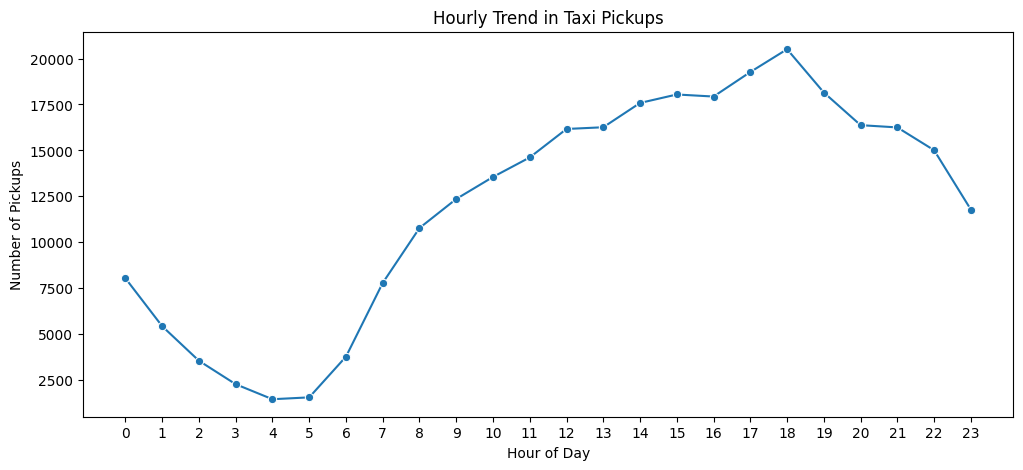

In [85]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title('Hourly Trend in Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.show()

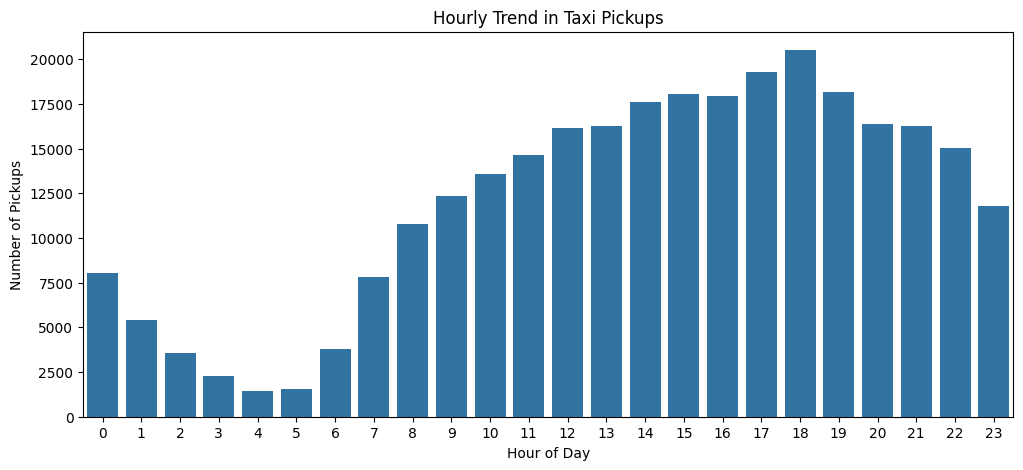

In [86]:
plt.figure(figsize=(12, 5))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title('Hourly Trend in Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.show()

In [87]:
# Find and show the daily trends in taxi pickups (days of the week)
df_sampled['pickup_weekday'] = df_sampled['tpep_pickup_datetime'].dt.dayofweek


In [88]:
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df_sampled['pickup_weekday'] = df_sampled['pickup_weekday'].map(weekday_map)

In [89]:
weekday_counts = df_sampled['pickup_weekday'].value_counts().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

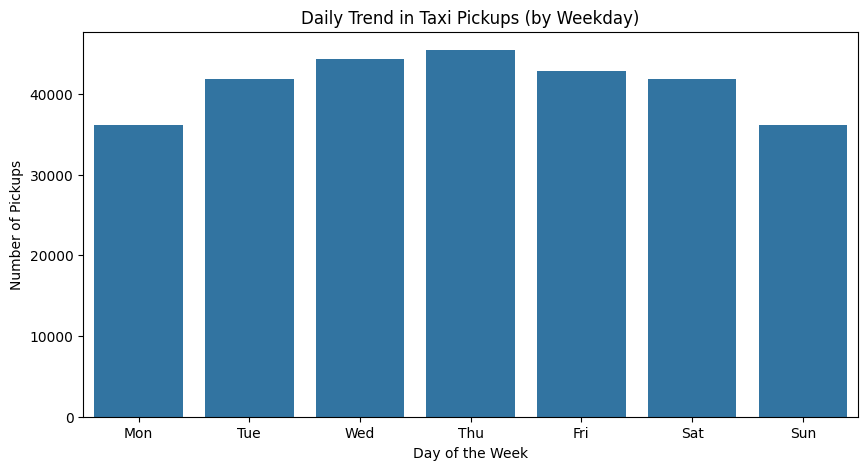

In [91]:
plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title('Daily Trend in Taxi Pickups (by Weekday)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.show()

In [93]:
# Show the monthly trends in pickups
df_sampled['pickup_month'] = df_sampled['tpep_pickup_datetime'].dt.month


In [94]:
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
             7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df_sampled['pickup_month'] = df_sampled['pickup_month'].map(month_map)

In [95]:
monthly_counts = df_sampled['pickup_month'].value_counts().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

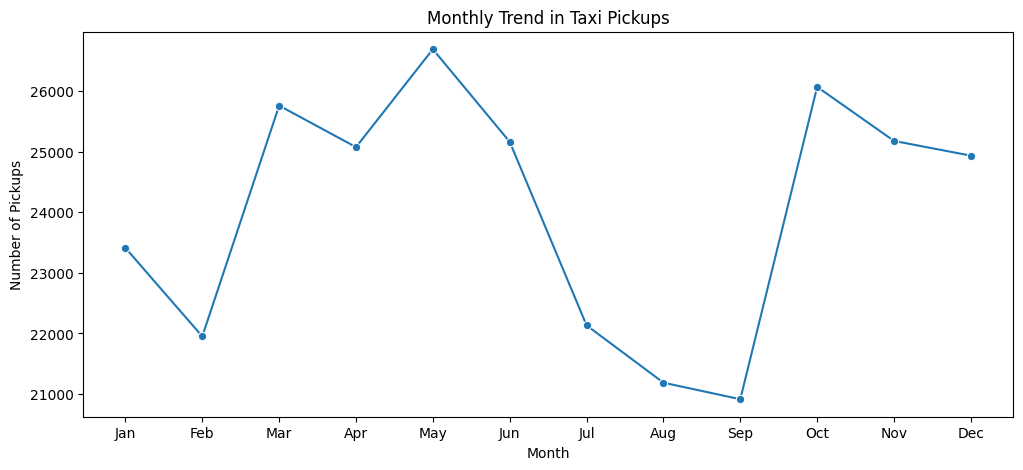

In [97]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.title('Monthly Trend in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()

In [98]:
monthly_counts = df_sampled['pickup_month'].value_counts().sort_index()

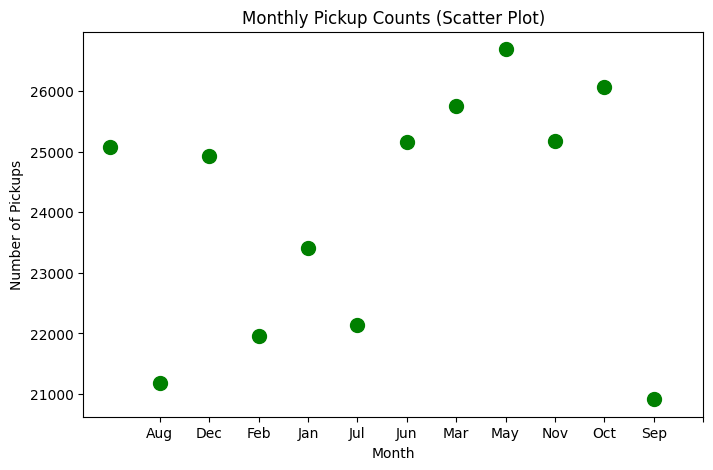

In [100]:
plt.figure(figsize=(8, 5))
plt.scatter(monthly_counts.index, monthly_counts.values, color='green', s=100)
plt.title('Monthly Pickup Counts (Scatter Plot)')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(range(1, 13))
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [101]:
# Analyse the above parameters
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']


In [102]:
for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col} - Zeros: {zero_count}, Negatives: {negative_count}")

fare_amount - Zeros: 107, Negatives: 0
tip_amount - Zeros: 68383, Negatives: 0
total_amount - Zeros: 55, Negatives: 12
trip_distance - Zeros: 5897, Negatives: 0


In [103]:
df_sampled = df_sampled[df_sampled['total_amount'] >= 0]


In [104]:
df_sampled = df_sampled[df_sampled['fare_amount'] > 0]



Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [105]:
# Create a df with non zero entries for the selected parameters.

df_sampled = df_sampled[df_sampled['trip_distance'] > 0]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [106]:
df_sampled['month'] = pd.to_datetime(df_sampled['tpep_pickup_datetime']).dt.to_period('M')

In [107]:
# Group data by month and analyse monthly revenue
monthly_revenue = df_sampled.groupby('month')['total_amount'].sum().reset_index()


In [108]:
monthly_revenue['month'] = monthly_revenue['month'].dt.to_timestamp()

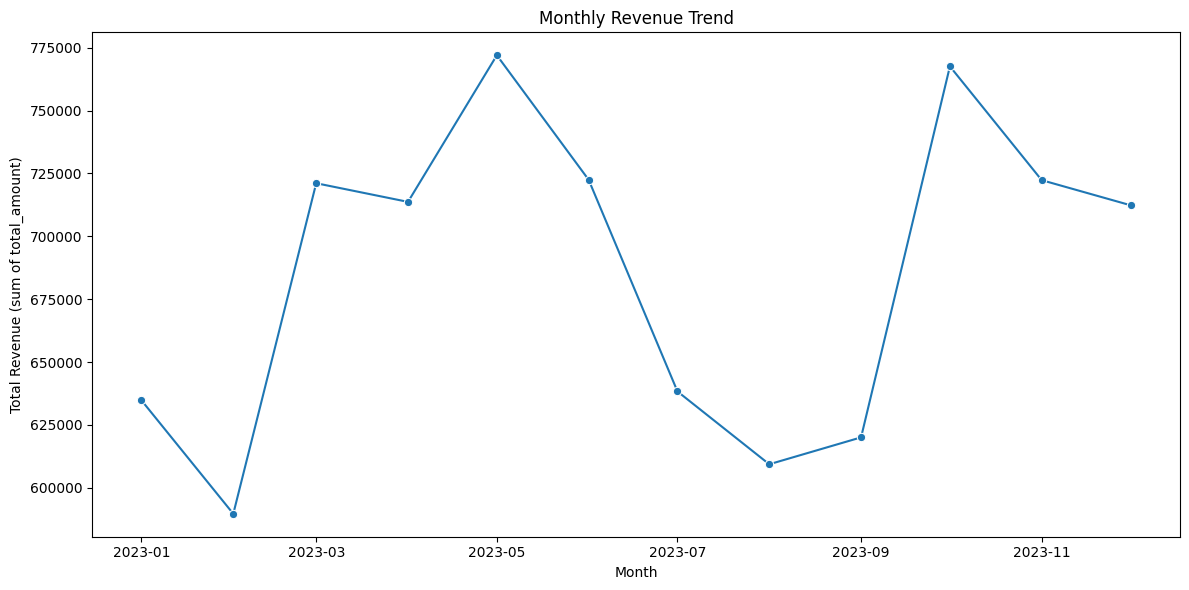

In [111]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_revenue, x='month', y='total_amount', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (sum of total_amount)')
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [112]:
# Calculate proportion of each quarter
df_sampled['tpep_pickup_datetime'] = pd.to_datetime(df_sampled['tpep_pickup_datetime'])


In [113]:
df_sampled['quarter'] = df_sampled['tpep_pickup_datetime'].dt.to_period('Q')

In [114]:
quarterly_revenue = df_sampled.groupby('quarter')['total_amount'].sum().reset_index()

In [115]:
# Calculate proportion of total revenue for each quarter
total_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue


In [116]:
print(quarterly_revenue)

  quarter  total_amount  proportion
0  2023Q1    1945527.31    0.236575
1  2023Q2    2208201.56    0.268516
2  2023Q3    1867706.59    0.227112
3  2023Q4    2202282.99    0.267796


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [117]:
df_filtered = df_sampled[df_sampled['trip_distance'] > 0]

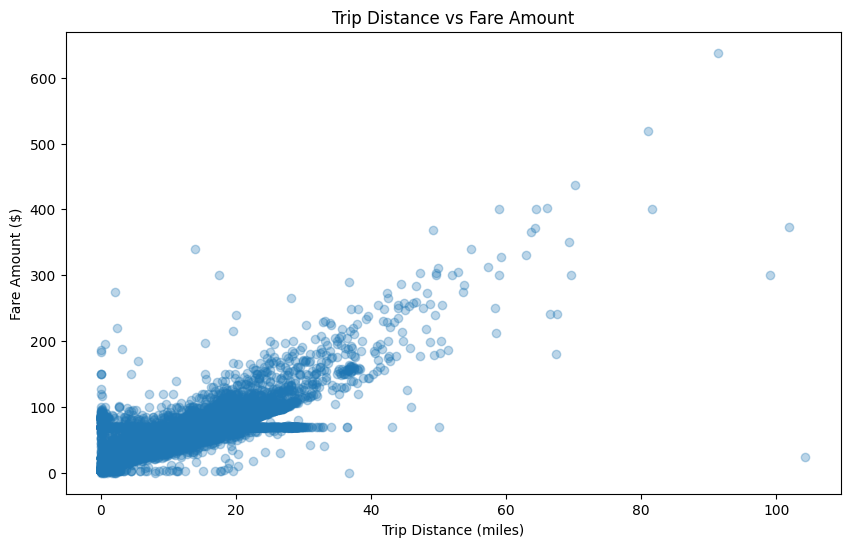

In [118]:
# Show how trip fare is affected by distance
plt.figure(figsize=(10,6))
plt.scatter(df_filtered['trip_distance'], df_filtered['fare_amount'], alpha=0.3)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()


In [119]:
correlation = df_filtered['trip_distance'].corr(df_filtered['fare_amount'])
print(f"Correlation between trip distance and fare amount: {correlation:.3f}")

Correlation between trip distance and fare amount: 0.945


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [120]:
df_sampled['tpep_pickup_datetime'] = pd.to_datetime(df_sampled['tpep_pickup_datetime'], errors='coerce')
df_sampled['tpep_dropoff_datetime'] = pd.to_datetime(df_sampled['tpep_dropoff_datetime'], errors='coerce')


In [121]:
df_sampled = df_sampled.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

In [122]:
df_sampled['trip_duration'] = (df_sampled['tpep_dropoff_datetime'] - df_sampled['tpep_pickup_datetime']).dt.total_seconds() / 60

In [123]:
# Filter out zero or negative durations
df_sampled = df_sampled[df_sampled['trip_duration'] > 0]

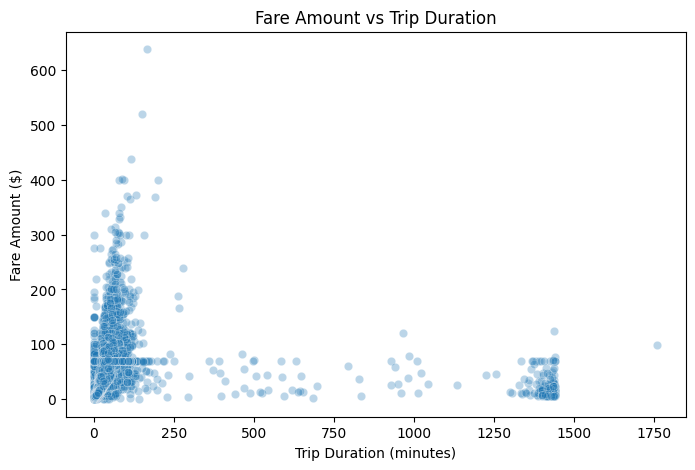

In [124]:
# Show relationship between fare and trip duration

plt.figure(figsize=(8,5))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df_sampled, alpha=0.3)
plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.show()

In [125]:
# Correlation
corr_fare_duration = df_sampled['fare_amount'].corr(df_sampled['trip_duration'])
print(f"Correlation between fare_amount and trip_duration: {corr_fare_duration:.3f}")

Correlation between fare_amount and trip_duration: 0.275


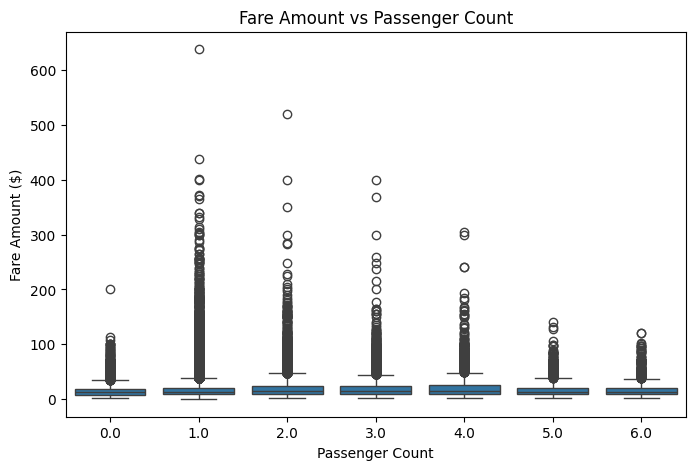

In [126]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(8,5))
sns.boxplot(x='passenger_count', y='fare_amount', data=df_sampled)
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

In [127]:
# Correlation
corr_fare_passenger = df_sampled['fare_amount'].corr(df_sampled['passenger_count'])
print(f"Correlation between fare_amount and passenger_count: {corr_fare_passenger:.3f}")

Correlation between fare_amount and passenger_count: 0.042


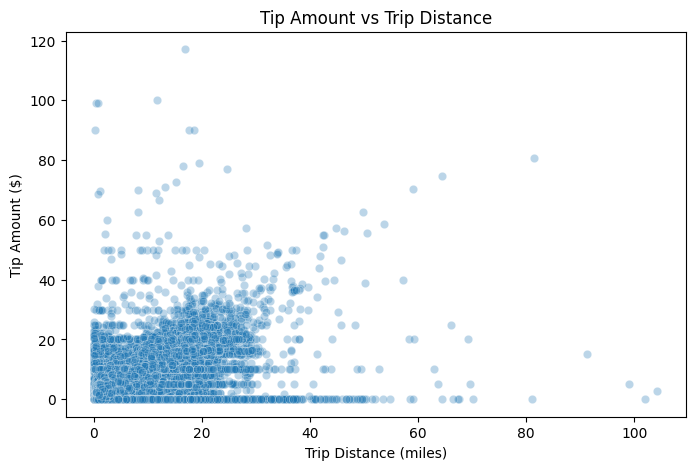

In [128]:
# Show relationship between tip and trip distance
plt.figure(figsize=(8,5))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df_sampled, alpha=0.3)
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()

In [129]:
# Correlation
corr_tip_distance = df_sampled['tip_amount'].corr(df_sampled['trip_distance'])
print(f"Correlation between tip_amount and trip_distance: {corr_tip_distance:.3f}")

Correlation between tip_amount and trip_distance: 0.594


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [130]:
# Counting the payment types
payment_counts = df_sampled['payment_type'].value_counts()

In [131]:
print("Payment Type Counts:")
print(payment_counts)

Payment Type Counts:
payment_type
1    234500
2     48528
4      1950
3      1047
Name: count, dtype: int64


In [132]:
payment_labels = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute'
}

In [133]:
df_sampled['payment_type_label'] = df_sampled['payment_type'].map(payment_labels)

In [134]:
payment_counts = df_sampled['payment_type_label'].value_counts()

print("Payment Type Counts:")
print(payment_counts)

Payment Type Counts:
payment_type_label
Credit card    234500
Cash            48528
Dispute          1950
No charge        1047
Name: count, dtype: int64


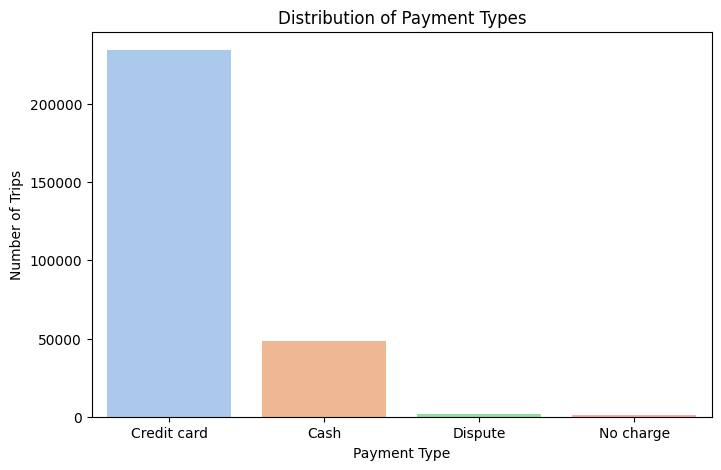

In [135]:
# Analyse the distribution of different payment types (payment_type).

plt.figure(figsize=(8,5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='pastel')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [136]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
shapefile_path = "/content/drive/MyDrive/taxi_zones"
zones = gpd.read_file(shapefile_path)
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [139]:
import matplotlib.pyplot as plt

In [140]:
# print(zones.info())
# zones.plot()

zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB


<Axes: >

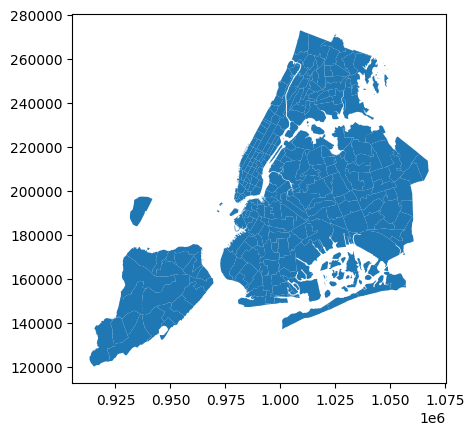

In [141]:
zones.plot()

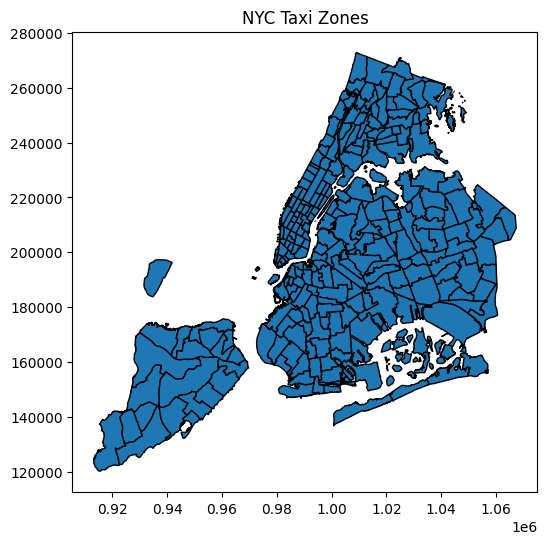

In [142]:
zones.plot(figsize=(6, 6), edgecolor='black')
plt.title("NYC Taxi Zones")
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



In [143]:
zones = gpd.read_file("/content/drive/MyDrive/taxi_zones")

**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [144]:
# Merge zones and trip records using locationID and PULocationID

df_sampled_with_zones = df_sampled.merge(zones[['LocationID', 'zone', 'borough', 'geometry']], how='left',
    left_on='PULocationID',
    right_on='LocationID')


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [145]:
# Group data by location and calculate the number of trips
trip_counts = df_sampled.groupby('PULocationID').size().reset_index(name='trip_count')


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [146]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = zones.merge(trip_counts, how='left', left_on='LocationID', right_on='PULocationID')
zones_with_trips['trip_count'] = zones_with_trips['trip_count'].fillna(0)



The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

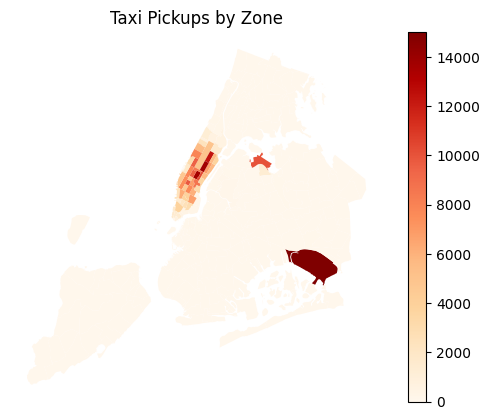

In [147]:
zones_with_trips.plot(column='trip_count', legend=True, cmap='OrRd')

plt.title("Taxi Pickups by Zone")
plt.axis('off')
plt.show()

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

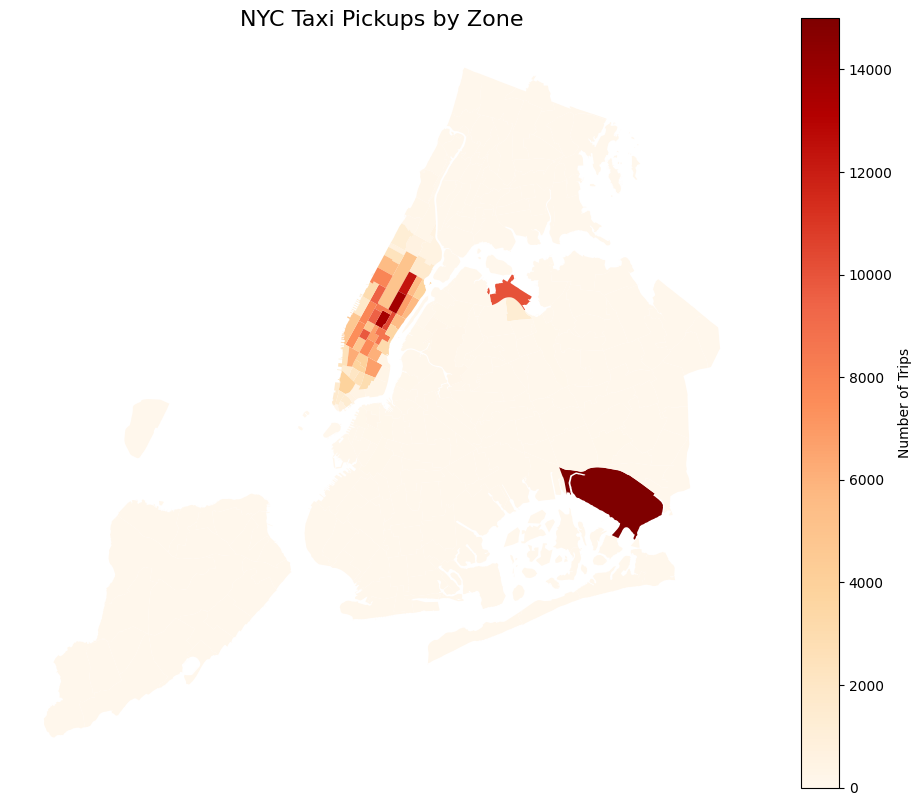

In [196]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones_with_trips.plot(
    column='trip_count',
    ax=ax,
    legend=True,
    cmap='OrRd',
    legend_kwds={'label': "Number of Trips", 'orientation': "vertical"}
)

ax.set_title("NYC Taxi Pickups by Zone", fontsize=16)
ax.axis('off')
plt.show()

In [149]:
# can you try displaying the zones DF sorted by the number of trips?
zones_with_trips_sorted = zones_with_trips.sort_values(by='trip_count', ascending=False)
zones_with_trips_sorted[['LocationID', 'zone', 'trip_count']].head(10)


,LocationID,zone,trip_count
131,132,JFK Airport,15011.0
236,237,Upper East Side South,13699.0
160,161,Midtown Center,13596.0
235,236,Upper East Side North,12298.0
161,162,Midtown East,10348.0
137,138,LaGuardia Airport,10082.0
185,186,Penn Station/Madison Sq West,9844.0
141,142,Lincoln Square East,9557.0
229,230,Times Sq/Theatre District,9519.0
169,170,Murray Hill,8625.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [150]:
import pandas as pd
import numpy as np

In [151]:
# Trip duration in hours
df_sampled['trip_duration_hours'] = (df_sampled['tpep_dropoff_datetime'] - df_sampled['tpep_pickup_datetime']).dt.total_seconds() / 3600

In [152]:
# Avoid very short trips
df_sampled = df_sampled[df_sampled['trip_duration_hours'] > 0]

In [153]:
# Average speed in mph
df_sampled['average_speed'] = df_sampled['trip_distance'] / df_sampled['trip_duration_hours']

In [154]:
df_sampled['pickup_hour'] = df_sampled['tpep_pickup_datetime'].dt.hour

In [155]:
grouped_speed = df_sampled.groupby(['pickup_hour', 'PULocationID', 'DOLocationID'])['average_speed'].mean().reset_index()

In [156]:
# Find routes which have the slowest speeds at different times of the day

slowest_routes = grouped_speed.sort_values(['pickup_hour', 'average_speed']).groupby('pickup_hour').first().reset_index()
slowest_routes.head(24)

,pickup_hour,PULocationID,DOLocationID,average_speed
0,0,233,4,0.114066
1,1,158,158,2.113706
2,2,170,125,0.131573
3,3,186,186,2.950820
4,4,38,226,0.698351
5,5,68,249,0.910624
6,6,265,265,0.467532
7,7,91,65,0.778098
8,8,262,100,0.150335
9,9,163,137,0.108982


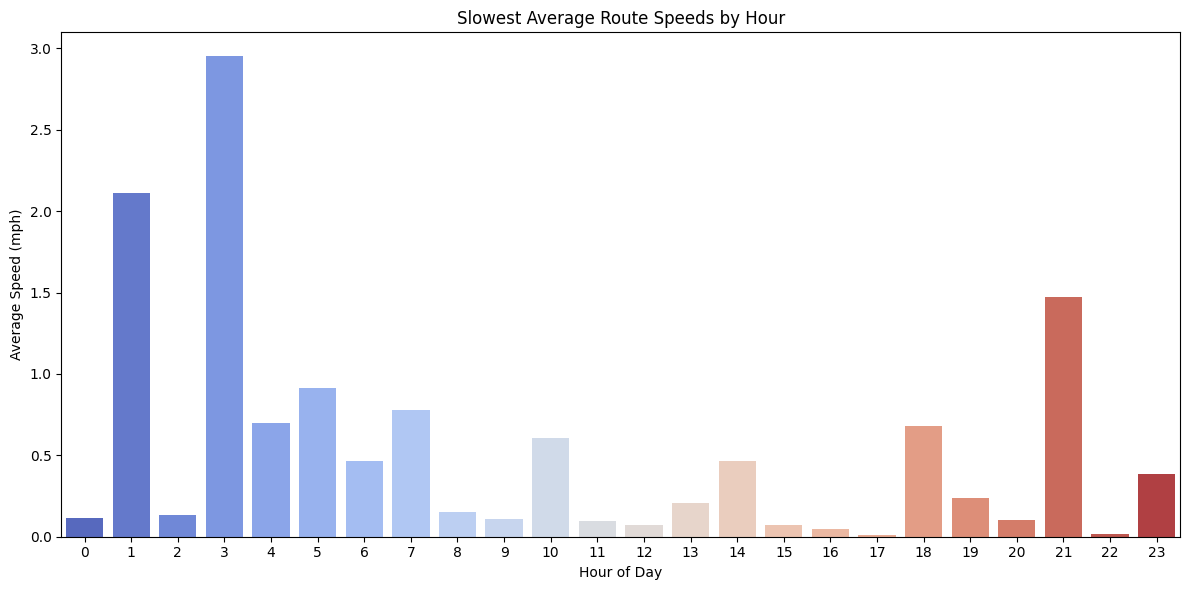

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(data=slowest_routes, x='pickup_hour', y='average_speed', palette='coolwarm')
plt.title('Slowest Average Route Speeds by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Speed (mph)')
plt.tight_layout()
plt.show()

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [158]:
df_sampled['pickup_hour'] = df_sampled['tpep_pickup_datetime'].dt.hour

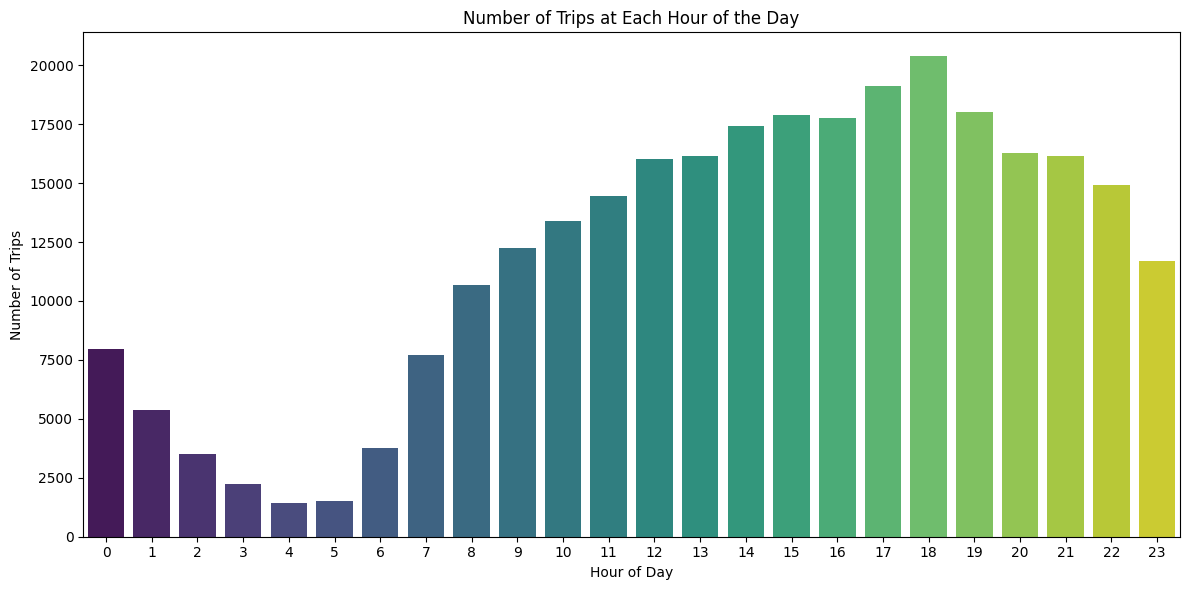

In [159]:
# Visualise the number of trips per hour and find the busiest hour

trips_by_hour = df_sampled.groupby('pickup_hour').size().reset_index(name='num_trips')

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=trips_by_hour, x='pickup_hour', y='num_trips', palette='viridis')
plt.title('Number of Trips at Each Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

In [160]:
# Highest number of trips

busiest_hour = trips_by_hour.loc[trips_by_hour['num_trips'].idxmax()]
print(f"Busiest hour: {busiest_hour['pickup_hour']} with {busiest_hour['num_trips']} trips")

Busiest hour: 18 with 20378 trips


**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [161]:
# Scale up the number of trips

sample_fraction = 0.009

# Fill in the value of your sampling fraction and use that to scale up the numbers

top5_hours = trips_by_hour.sort_values(by='num_trips', ascending=False).head(5)

top5_hours['estimated_total_trips'] = (top5_hours['num_trips'] / sample_fraction).astype(int)
top5_hours



,pickup_hour,num_trips,estimated_total_trips
18,18,20378,2264222
17,17,19136,2126222
19,19,18018,2002000
15,15,17882,1986888
16,16,17755,1972777


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [162]:
df_sampled['tpep_pickup_datetime'] = pd.to_datetime(df_sampled['tpep_pickup_datetime'])

In [163]:
df_sampled['day_of_week'] = df_sampled['tpep_pickup_datetime'].dt.dayofweek
df_sampled['day_type'] = df_sampled['day_of_week'].apply(lambda x: 'Weekend' if x >=5 else 'Weekday')

In [164]:
# Compare traffic trends for the week days and weekends

df_sampled['hour'] = df_sampled['tpep_pickup_datetime'].dt.hour
trips_by_daytype_hour = df_sampled.groupby(['day_type', 'hour']).size().reset_index(name='num_trips')

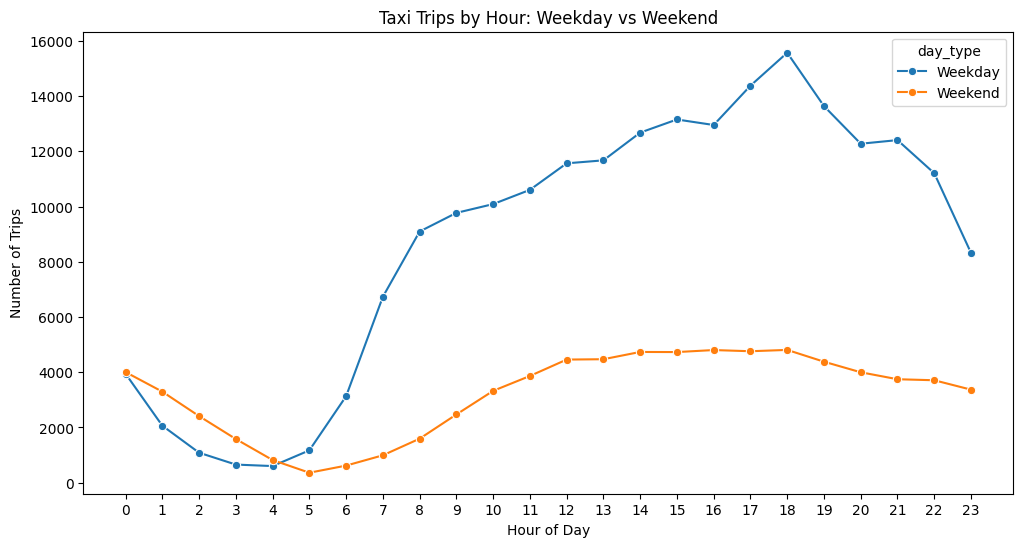

In [165]:
plt.figure(figsize=(12,6))
sns.lineplot(data=trips_by_daytype_hour, x='hour', y='num_trips', hue='day_type', marker='o')
plt.title('Taxi Trips by Hour: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0,24))
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [166]:
# Find top 10 pickup and dropoff zones



Top 10 Pickup Zones:
PULocationID
132    15011
237    13699
161    13596
236    12298
162    10348
138    10082
186     9844
142     9557
230     9519
170     8625
Name: count, dtype: int64


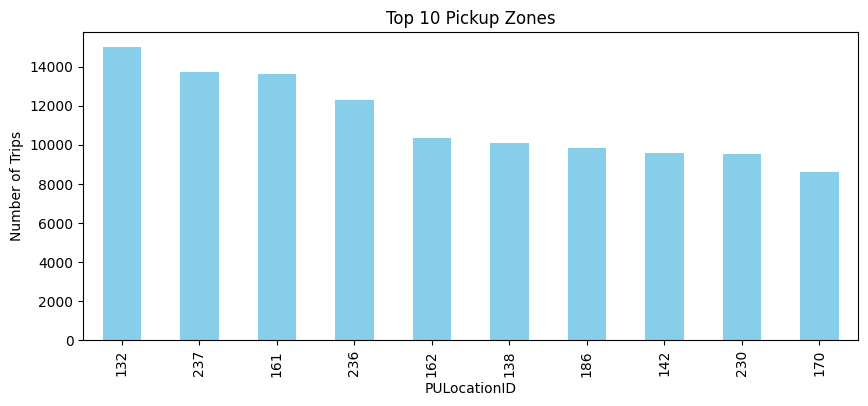

In [167]:
# Trips by pickup location

top10_pickups = df_sampled['PULocationID'].value_counts().head(10)
print("Top 10 Pickup Zones:")
print(top10_pickups)

plt.figure(figsize=(10,4))
top10_pickups.plot(kind='bar', color='skyblue')
plt.title('Top 10 Pickup Zones')
plt.xlabel('PULocationID')
plt.ylabel('Number of Trips')
plt.show()


Top 10 Dropoff Zones:
DOLocationID
236    12825
237    12237
161    11259
230     8839
170     8342
162     8296
142     8067
239     8050
141     7520
163     7235
Name: count, dtype: int64


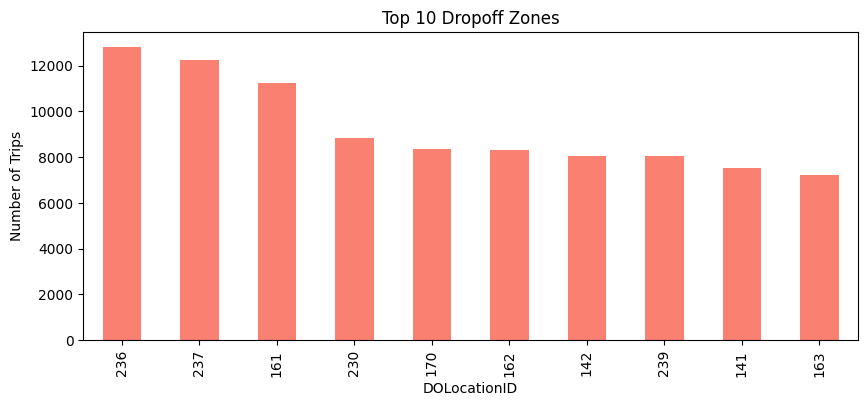

In [168]:
# Trips by drop off Zone

top10_dropoffs = df_sampled['DOLocationID'].value_counts().head(10)
print("\nTop 10 Dropoff Zones:")
print(top10_dropoffs)

plt.figure(figsize=(10,4))
top10_dropoffs.plot(kind='bar', color='salmon')
plt.title('Top 10 Dropoff Zones')
plt.xlabel('DOLocationID')
plt.ylabel('Number of Trips')
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [169]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df_sampled['PULocationID'].value_counts()
dropoff_counts = df_sampled['DOLocationID'].value_counts()


In [170]:
location_stats = pd.DataFrame({
    'pickups': pickup_counts,
    'dropoffs': dropoff_counts
}).fillna(0)

location_stats['pickup_dropoff_ratio'] = location_stats['pickups'] / (location_stats['dropoffs'] + 1e-6)

In [171]:
top_10_ratios = location_stats.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_10_ratios = location_stats.sort_values(by='pickup_dropoff_ratio').head(10)

print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratios)

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom_10_ratios)

Top 10 Pickup/Dropoff Ratios:
     pickups  dropoffs  pickup_dropoff_ratio
70    1291.0       117             11.034188
132  15011.0      3016              4.977122
138  10082.0      3550              2.840000
186   9844.0      6264              1.571520
43    4929.0      3554              1.386888
114   3754.0      2718              1.381163
249   6263.0      4801              1.304520
162  10348.0      8296              1.247348
161  13596.0     11259              1.207567
142   9557.0      8067              1.184703

Bottom 10 Pickup/Dropoff Ratios:
     pickups  dropoffs  pickup_dropoff_ratio
27       0.0         3                   0.0
30       0.0         4                   0.0
245      0.0         7                   0.0
240      0.0         9                   0.0
221      0.0         5                   0.0
187      0.0         1                   0.0
204      0.0         3                   0.0
156      0.0         3                   0.0
111      0.0         3              

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [172]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = list(range(23, 24)) + list(range(0, 6))
df_night = df_sampled[df_sampled['hour'].isin(night_hours)]

top10_night_pickups = df_night['PULocationID'].value_counts().head(10)
print("Top 10 Pickup Zones (11 PM to 5 AM):")
print(top10_night_pickups)

top10_night_dropoffs = df_night['DOLocationID'].value_counts().head(10)
print("Top 10 Dropoff Zones (11 PM to 5 AM):")
print(top10_night_dropoffs)

Top 10 Pickup Zones (11 PM to 5 AM):
PULocationID
79     2439
132    2288
249    1876
48     1647
148    1514
114    1402
230    1221
186    1074
164    1000
138     952
Name: count, dtype: int64
Top 10 Dropoff Zones (11 PM to 5 AM):
DOLocationID
79     1251
48     1080
170     990
68      950
107     894
249     833
141     760
230     732
263     722
236     700
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [173]:
# Filter for night hours (11 PM to 5 AM)

night_hours = list(range(23, 24)) + list(range(0, 6))
day_hours = list(range(6, 23))

night_revenue = df_sampled[df_sampled['hour'].isin(night_hours)]['total_amount'].sum()
day_revenue = df_sampled[df_sampled['hour'].isin(day_hours)]['total_amount'].sum()

total_revenue = night_revenue + day_revenue

night_share = night_revenue / total_revenue
day_share = day_revenue / total_revenue

print(f"Nighttime revenue share: {night_share:.2%}")
print(f"Daytime revenue share: {day_share:.2%}")

Nighttime revenue share: 11.99%
Daytime revenue share: 88.01%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [174]:
# Analyse the fare per mile per passenger for different passenger counts

df_filtered = df_sampled[df_sampled['trip_distance'] > 0]

# calculate fare for each trip
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']

# calculate fare for per passenger for each trip
df_filtered = df_filtered[df_filtered['passenger_count'] > 0]
df_filtered['fare_per_mile_per_passenger'] = df_filtered['fare_per_mile'] / df_filtered['passenger_count']

avg_fare_per_mile_per_passenger = df_filtered.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

print(avg_fare_per_mile_per_passenger)

passenger_count
1.0    10.980604
2.0     6.583250
3.0     3.836099
4.0     3.929672
5.0     1.751302
6.0     1.350214
Name: fare_per_mile_per_passenger, dtype: float64


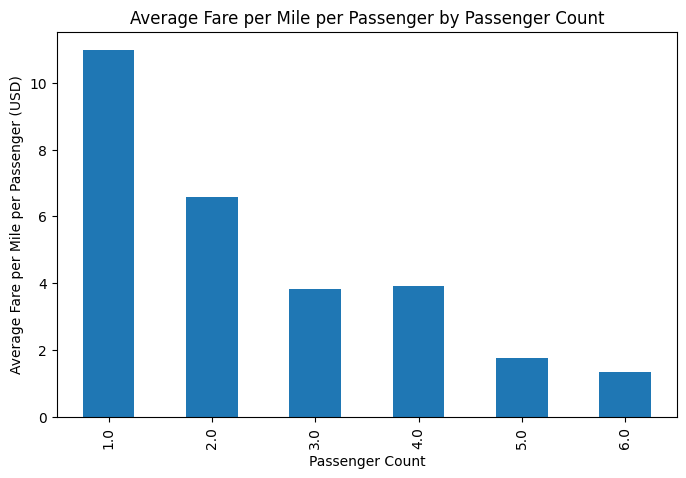

In [175]:
avg_fare_per_mile_per_passenger.plot(kind='bar', figsize=(8,5), title='Average Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare per Mile per Passenger (USD)')
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [176]:
# Compare the average fare per mile for different days and for different times of the day

df_filtered = df_sampled[df_sampled['trip_distance'] > 0].copy()

# calculate fare
df_filtered['fare_per_mile'] = df_filtered['fare_amount'] / df_filtered['trip_distance']

df_filtered['hour'] = pd.to_datetime(df_filtered['tpep_pickup_datetime']).dt.hour
df_filtered['day'] = pd.to_datetime(df_filtered['tpep_pickup_datetime']).dt.day_name()

# Group by hour and day
avg_fare_hour = df_filtered.groupby('hour')['fare_per_mile'].mean()
avg_fare_day = df_filtered.groupby('day')['fare_per_mile'].mean()

print("Average fare per mile by hour:\n", avg_fare_hour)
print("\nAverage fare per mile by day:\n", avg_fare_day)

Average fare per mile by hour:
 hour
0     11.734579
1     13.333495
2      9.826001
3      8.942006
4      7.674005
5     12.457749
6     14.180078
7     10.183094
8      9.418524
9     10.201909
10    10.443648
11    10.171182
12    12.567372
13    11.677216
14    10.983888
15    14.460514
16    13.543851
17    12.418696
18    12.481908
19    11.664742
20     9.383037
21     9.459871
22     9.739303
23    10.158769
Name: fare_per_mile, dtype: float64

Average fare per mile by day:
 day
Friday       10.709468
Monday       12.151528
Saturday     11.607071
Sunday       11.657852
Thursday     11.473822
Tuesday      11.081633
Wednesday    10.923922
Name: fare_per_mile, dtype: float64


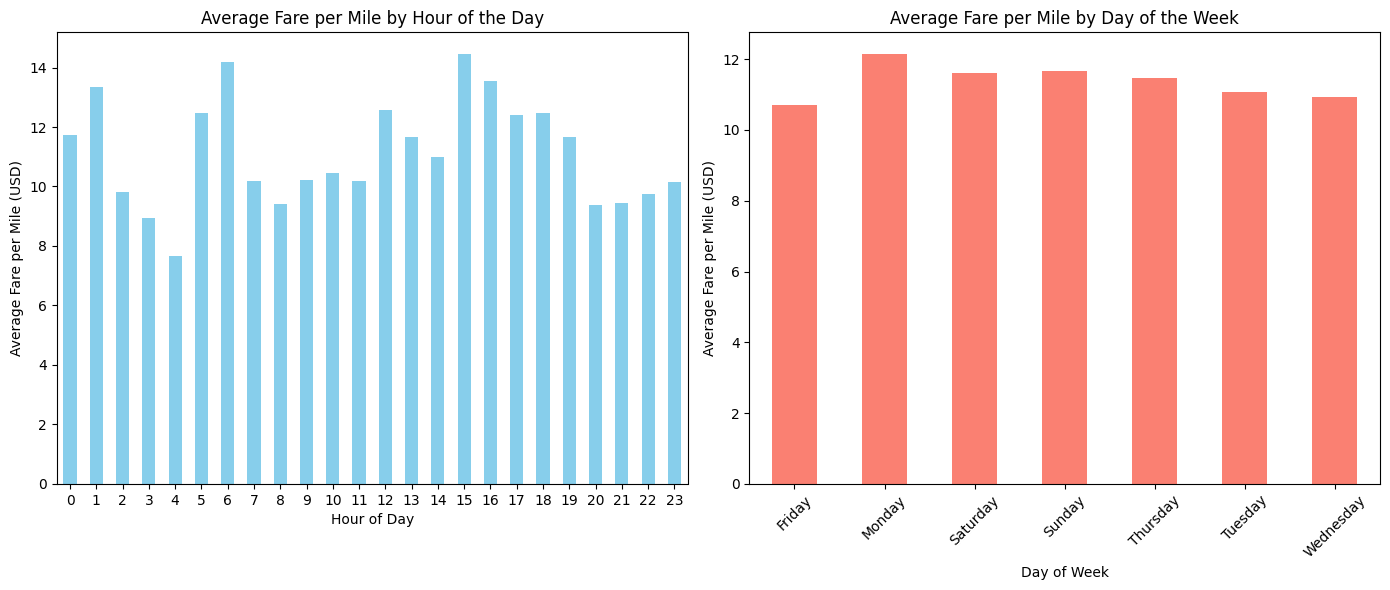

In [197]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
avg_fare_hour.plot(kind='bar', color='skyblue')
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile (USD)')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
avg_fare_day.plot(kind='bar', color='salmon')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Fare per Mile (USD)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [178]:
# Compare fare per mile for different vendors

avg_fare_vendor = df_filtered.groupby('VendorID')['fare_per_mile'].mean()

print("Average fare per mile by VendorID:")
print(avg_fare_vendor)


Average fare per mile by VendorID:
VendorID
1     8.18831
2    12.47255
Name: fare_per_mile, dtype: float64


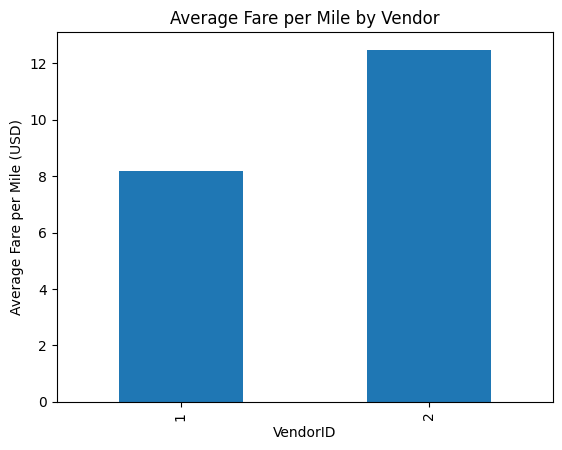

In [179]:
avg_fare_vendor.plot(kind='bar')
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('VendorID')
plt.ylabel('Average Fare per Mile (USD)')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [180]:
# Defining distance tiers

distance_bins = [0, 2, 5, float('inf')]
distance_labels = ['0-2 miles', '2-5 miles', '5+ miles']
df_filtered['distance_tier'] = pd.cut(df_filtered['trip_distance'], bins=distance_bins, labels=distance_labels, right=True)

tiered_fare = df_filtered.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().unstack()

print(tiered_fare)

distance_tier  0-2 miles  2-5 miles  5+ miles
VendorID                                     
1              10.014354   6.377616  4.411144
2              18.029354   6.565769  4.499829


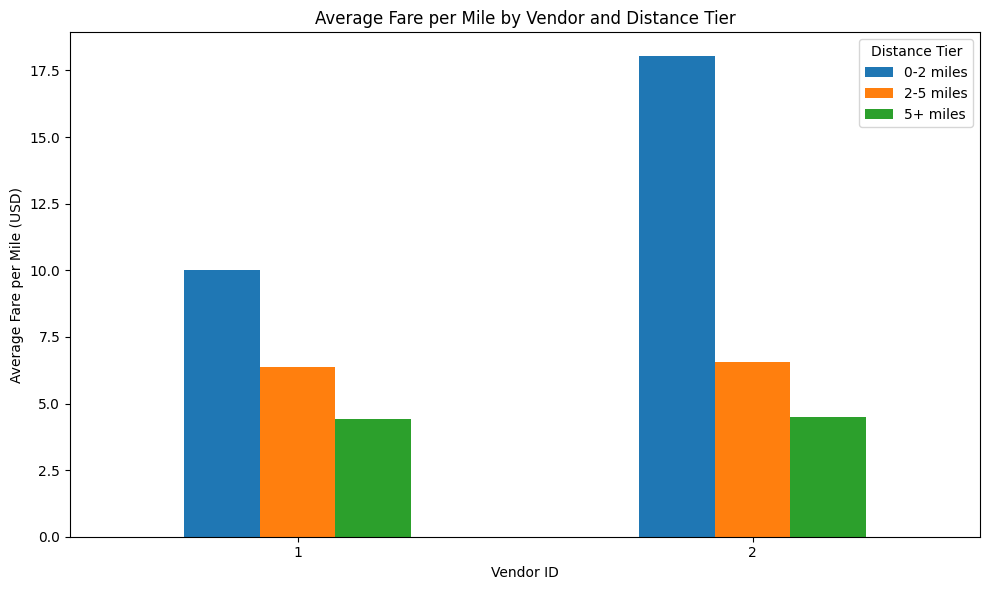

In [195]:
tiered_fare.plot(kind='bar', figsize=(10, 6))

plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile (USD)')
plt.legend(title='Distance Tier')
plt.xticks(rotation=0)
# plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

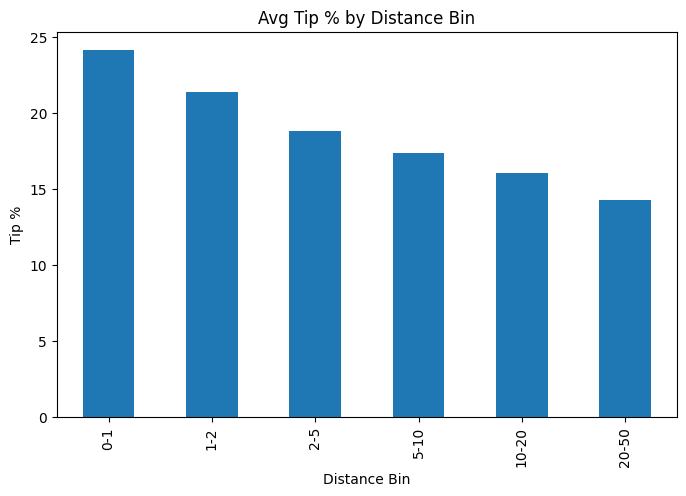

In [182]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_sampled['tip_percent'] = (df_sampled['tip_amount'] / (df_sampled['fare_amount'] + 1e-5)) * 100

distance_bins = [0, 1, 2, 5, 10, 20, 50]
distance_labels = ['0-1', '1-2', '2-5', '5-10', '10-20', '20-50']
df_sampled['distance_bin'] = pd.cut(df_sampled['trip_distance'], bins=distance_bins, labels=distance_labels)

avg_tip_by_distance = df_sampled.groupby('distance_bin')['tip_percent'].mean()

avg_tip_by_distance.plot(kind='bar', title='Avg Tip % by Distance Bin', ylabel='Tip %', xlabel='Distance Bin', figsize=(8, 5))
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

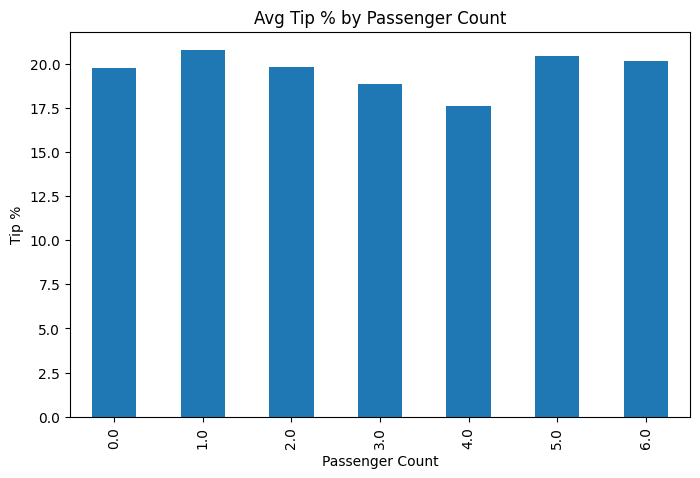

In [183]:
# calculation of tip by passenger count

avg_tip_by_passengers = df_sampled.groupby('passenger_count')['tip_percent'].mean()

avg_tip_by_passengers.plot(kind='bar', title='Avg Tip % by Passenger Count', ylabel='Tip %', xlabel='Passenger Count', figsize=(8, 5))
plt.show()

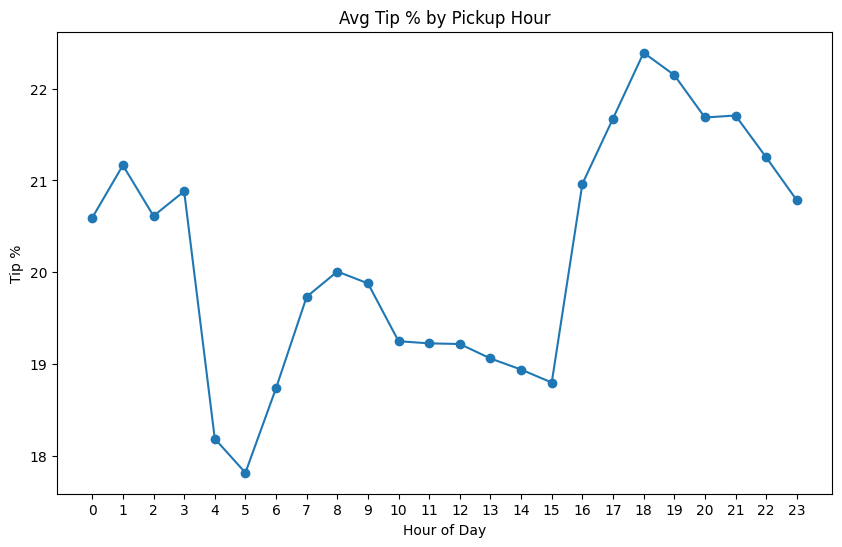

In [184]:
# calculation of tip by pickup hour

df_sampled['pickup_hour'] = df_sampled['tpep_pickup_datetime'].dt.hour

avg_tip_by_hour = df_sampled.groupby('pickup_hour')['tip_percent'].mean()

avg_tip_by_hour.plot(kind='line', marker='o', title='Avg Tip % by Pickup Hour', ylabel='Tip %', xlabel='Hour of Day', figsize=(10, 6))
plt.xticks(range(0, 24))
plt.show()

In [185]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tip = df_sampled[df_sampled['tip_percent'] < 10]
high_tip = df_sampled[df_sampled['tip_percent'] > 25]

comparison = {
    'Avg Distance': [low_tip['trip_distance'].mean(), high_tip['trip_distance'].mean()],
    'Avg Passenger Count': [low_tip['passenger_count'].mean(), high_tip['passenger_count'].mean()],
    'Avg Fare Amount': [low_tip['fare_amount'].mean(), high_tip['fare_amount'].mean()],
    'Avg Pickup Hour': [low_tip['pickup_hour'].mean(), high_tip['pickup_hour'].mean()]
}

pd.DataFrame(comparison, index=['Tip < 10%', 'Tip > 25%'])

,Avg Distance,Avg Passenger Count,Avg Fare Amount,Avg Pickup Hour
Tip < 10%,3.906580,1.415286,21.490011,13.944291
Tip > 25%,2.300564,1.344217,14.401366,14.598216


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [186]:
# Extract hour and day information

df_sampled['pickup_hour'] = df_sampled['tpep_pickup_datetime'].dt.hour
df_sampled['pickup_day'] = df_sampled['tpep_pickup_datetime'].dt.day_name()

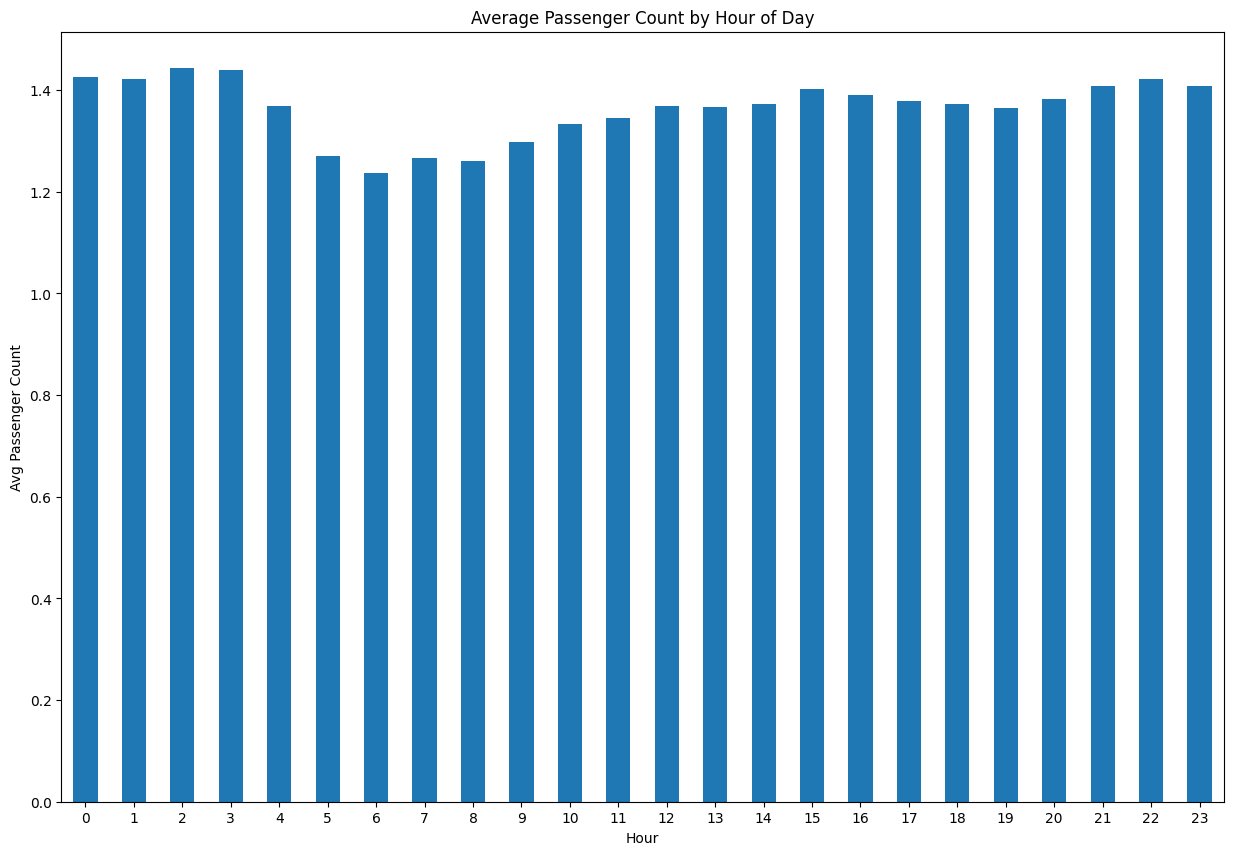

In [187]:
# See how passenger count varies across hours and days

hourly_passenger_avg = df_sampled.groupby('pickup_hour')['passenger_count'].mean()

hourly_passenger_avg.plot(kind='bar', figsize=(15, 10), title='Average Passenger Count by Hour of Day', xlabel='Hour', ylabel='Avg Passenger Count')
plt.xticks(rotation=0)
plt.show()


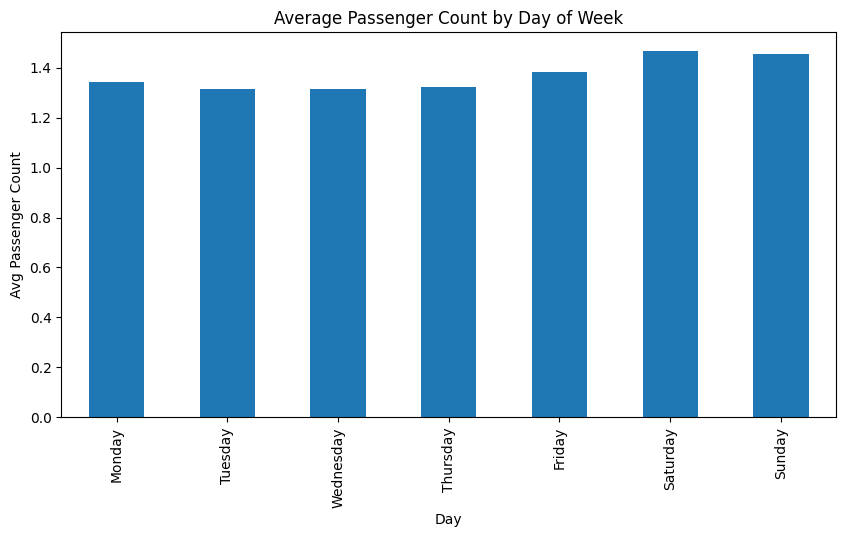

In [188]:
# Passenger count by day of the week

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_passenger_avg = df_sampled.groupby('pickup_day')['passenger_count'].mean().reindex(days_order)

daily_passenger_avg.plot(kind='bar', figsize=(10, 5), title='Average Passenger Count by Day of Week', xlabel='Day', ylabel='Avg Passenger Count')
plt.show()

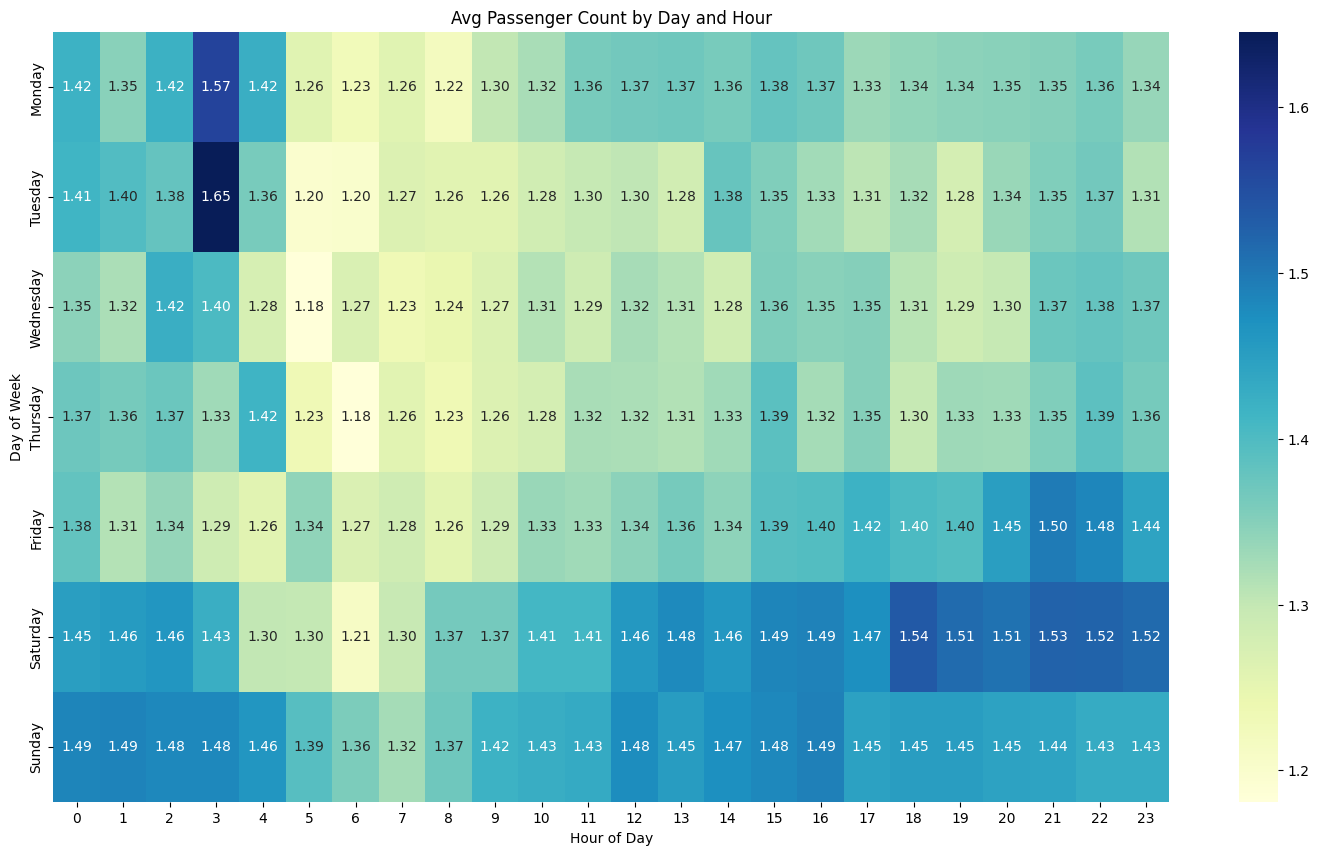

In [189]:
pivot = df_sampled.pivot_table(index='pickup_day', columns='pickup_hour', values='passenger_count', aggfunc='mean').reindex(days_order)

plt.figure(figsize=(18, 10))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Avg Passenger Count by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [190]:
avg_passenger_by_zone = df_sampled.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.columns = ['LocationID', 'avg_passenger_count']

In [191]:
# How does passenger count vary across zones

zones_with_passenger = zones.merge(avg_passenger_by_zone, left_on='LocationID', right_on='LocationID')


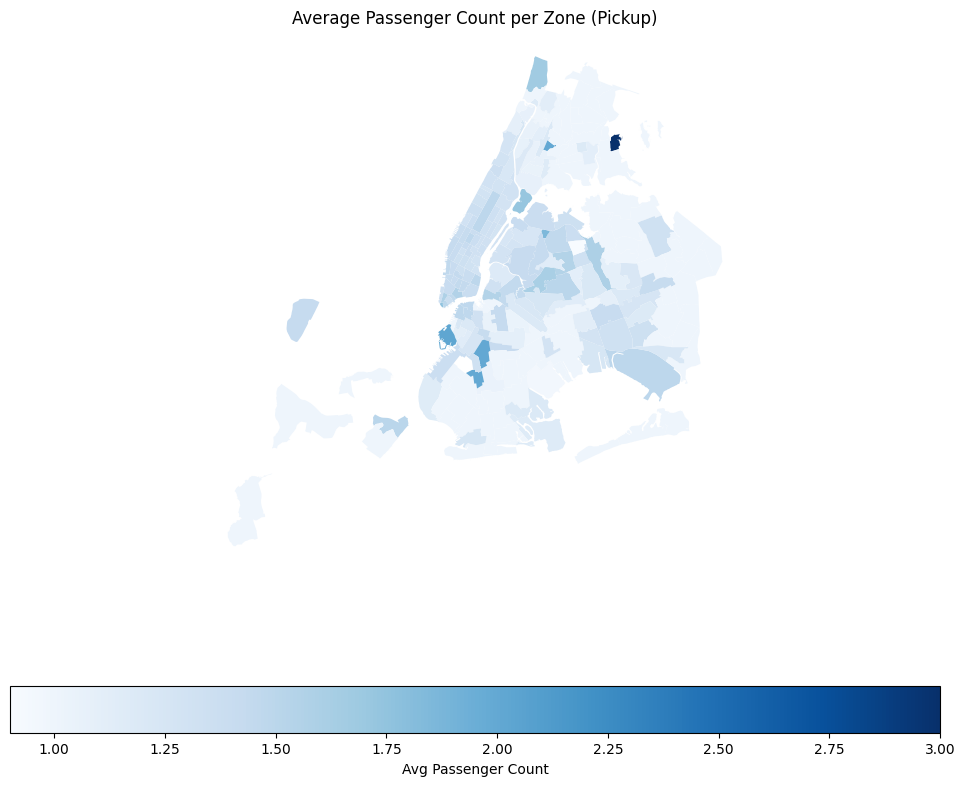

In [192]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_passenger.plot(column='avg_passenger_count',
                          ax=ax,
                          legend=True,
                          cmap='Blues',
                          legend_kwds={'label': "Avg Passenger Count", 'orientation': "horizontal"})
ax.set_title("Average Passenger Count per Zone (Pickup)")
ax.axis('off')
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [193]:
print(df_sampled.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'tip_amount',
       'tolls_amount', 'total_amount', 'date', 'hour', 'airport_fee',
       'payment_type_label', 'pickup_hour', 'pickup_weekday', 'pickup_month',
       'month', 'quarter', 'trip_duration', 'trip_duration_hours',
       'average_speed', 'day_of_week', 'day_type', 'tip_percent',
       'distance_bin', 'pickup_day'],
      dtype='object')


In [194]:
# How often is each surcharge applied?

# I dropped the surcharge column early on in the  data cleaning process. So, I didn’t include any analysis related to surcharges.

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

The analysis gave useful insights into taxi trip patterns across different times, locations, and passenger behaviors. Busiest hours were typically in the evening, and weekends saw higher activity. Fare amounts were influenced by distance, duration, and the number of passengers. Tip amounts also increased with longer distances. Some zones were consistently busy, especially during peak hours.

**Recommendations**


*   Ensure more taxis are available during peak hours and in high-demand zones.
*   Try to understand slow routes and avoid them during rush hours.


*   Focus more on areas where pickups happen often.
*   Avoid sending too many cabs to low-demand areas late at night.


*   Use passenger and distance data to match supply better.







**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**Suggestions for cab positioning**


*  Place more cabs in zones that are busy during peak hours like mornings (8–10 AM) and evenings (5–8 PM).
*   Focus on weekends for higher cab availability in shopping, tourist, and entertainment zones.

*   Move some cabs to less busy zones during non-peak hours to avoid overcrowding in popular areas.
*  Monitor daily patterns and shift cab availability based on demand trends seen during different days and hours.





**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

**Suggestions for Pricing Strategy**



*   Slightly increase fares during peak hours or in high-demand zones to make use of high demand.
*   Keep pricing reasonable so that customers don’t switch to competitors.


*   Offer small discounts or promotions during off-peak hours to attract more customers.


*   Consider adjusting fare per mile based on distance tiers, as shorter trips tend to have higher per-mile costs.






